# Keras Classification

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [122]:
# from google.colab import drive
# drive.mount('/content/drive')

In [123]:
from sklearn.datasets import load_breast_cancer

In [124]:
cancer = load_breast_cancer()

In [125]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [126]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [127]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [128]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [129]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [130]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [132]:
df.shape

(569, 31)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [136]:
df.Cancer.value_counts()

1    357
0    212
Name: Cancer, dtype: int64

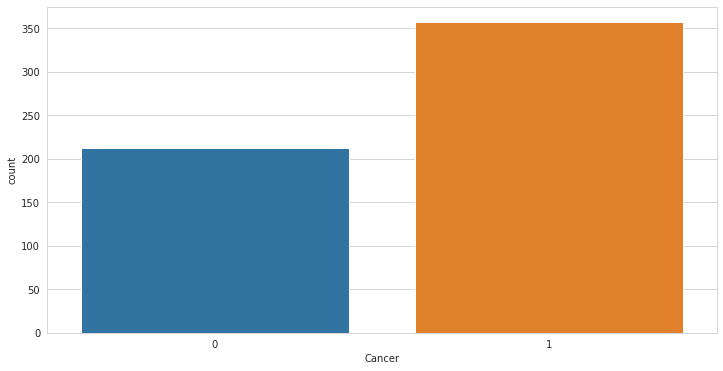

In [137]:
sns.countplot(df["Cancer"])

# balance bir data

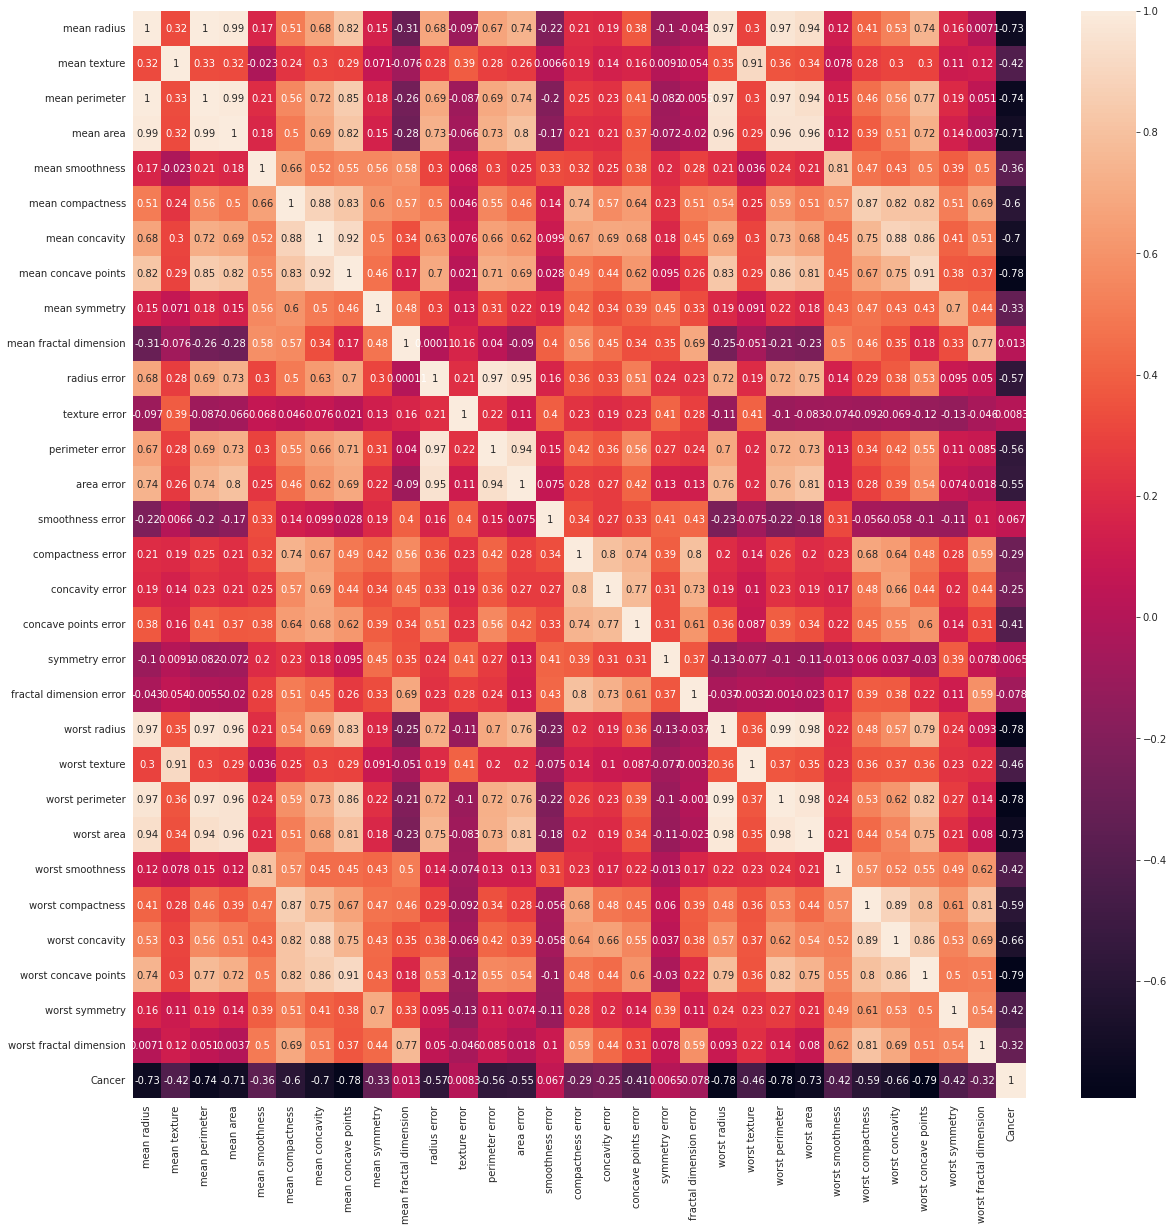

In [138]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [139]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

# multicolinarity olan feature ları sildim.

In [140]:
df=df.drop(drop_list, axis=1)

In [141]:
df.shape

(569, 25)

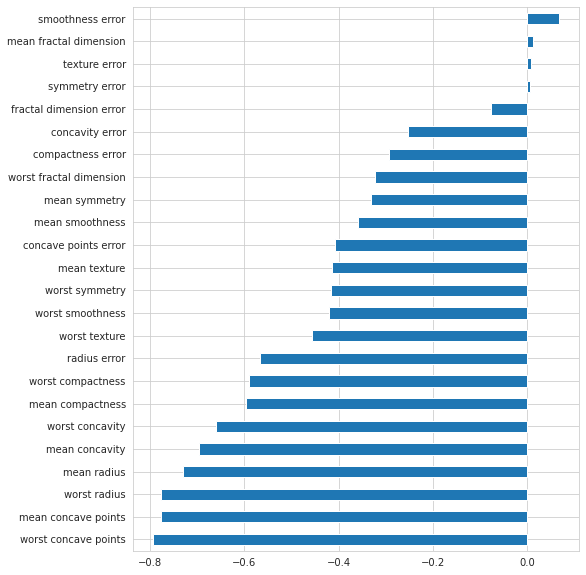

In [142]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [144]:
X = df.drop('Cancer', axis=1)
y = df['Cancer'].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [146]:
scaler = MinMaxScaler()

# verileri daha dar bir aralığa topladığı için ve daha hız kazandırdığı için MinMaxScaler tercih nedeni.

In [148]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit'i ve transformu X_train ile, transformu tek başına ise X_test ile yapıyorum, data leakege ı önleme adına.

## Modelling & Model Performance

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix #class problemi oldgu icin
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [150]:
X_train.shape

(512, 24)

In [151]:
X_test.shape

(57, 24)

In [152]:
model = Sequential()

model.add(Dense(30, activation = "relu"))  # sigunt ve hiperb. e göre öğrenme daha fazla olduğu için relu kullandık.
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# 24 feature için nöron sayısını 30 a çıkarttım. sonra ikinci layerda 15 e düşürdüm. 
# outputda 1 (. üçgen oluşturmayı tercih ettim.
# sigmoid aynı zamanda logistic fonksiyondu ve datayı 0 ile 1 arasına sıkıştırıyordu. çıkış layer da bunu kullanmam daha doğru olur.
# çıkış binary olduğundan, loss metriği olarak binarı_crossentropy kullandım.

In [153]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

# eğitim için kullanılacak datanın %10 luk bölümünü ayırdık (validation_split = 0.1).
# onu hiç bir şekilde eğitime sokmuyoruz. onu validasyon yaparken kullanacak.

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.6865 - accuracy: 0.5761 - val_loss: 0.6852 - val_accuracy: 0.5192
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6870 - val_loss: 0.6432 - val_accuracy: 0.6346
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7761 - val_loss: 0.5986 - val_accuracy: 0.8269
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.8391 - val_loss: 0.5484 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.8717 - val_loss: 0.4898 - val_accuracy: 0.8654
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.8870 - val_loss: 0.4272 - val_accuracy: 0.8654
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.9065 - val_loss: 0.3676 - val_accuracy: 0.9423
Epoch

In [154]:
model.summary()

# 1000 x 15 iterasyon oldu.
# her iterasyonda 1231 tane parametre güncellemesi yapıldı. yani 15000 kere değişti

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                750       
_________________________________________________________________
dense_34 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 16        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [155]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

# loss ve val_loss iterasyonlar ilerledikçe aşağıya doğru azaldı. 
# accuracy ve val_accurasy değeri de tabi ki artıyor.

,loss,accuracy,val_loss,val_accuracy
0,0.686,0.576,0.685,0.519
1,0.648,0.687,0.643,0.635
2,0.608,0.776,0.599,0.827
3,0.564,0.839,0.548,0.865
4,0.514,0.872,0.490,0.865


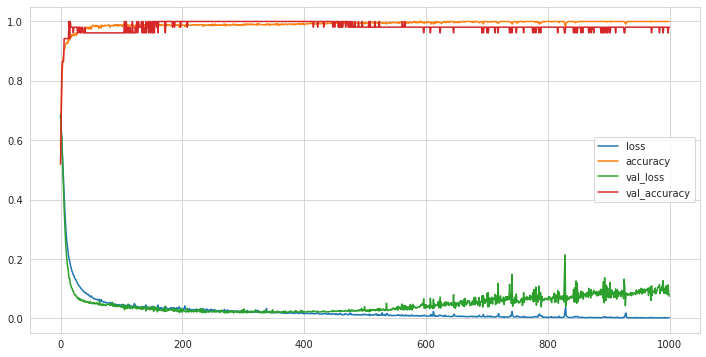

In [156]:
loss_df.plot();

# 300 değerinden sonra overfit e gitmiş.
# accuracy de azalmaya başlamış

In [158]:
model.evaluate(X_test, y_test, verbose=0)
# skor almak için  
# overfit oldugu için skor çok düşük
# 2 skor verdi çünkü model evaluatein içine accuracye bakmasını da  istediğim için , recall yazsaydık onu da verirdi.(bir alt satır) 

[0.3007600009441376, 0.9298245906829834]

In [159]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3007600009441376
accuracy :  0.9298245906829834


In [160]:
# manuel yontem ile bakalım bir de 
y_pred = (model.predict(X_test) > 0.5).astype("int32")   # 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



### EarlyStopping

In [161]:
from tensorflow.keras.callbacks import EarlyStopping

In [162]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [163]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [164]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

# EarlyStop kullanarak az önceki overfittingin önüne geçeceğiz.

# earlystop hangi değişkeni monitör edecek, val_loss.
# kaç epochs sabredecek, 15

In [165]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

# train setimin sondaki %10 unu ayırdık. 

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.6883 - accuracy: 0.6217 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.7630 - val_loss: 0.6526 - val_accuracy: 0.8654
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.8196 - val_loss: 0.6177 - val_accuracy: 0.8462
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8370 - val_loss: 0.5763 - val_accuracy: 0.9038
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.8804 - val_loss: 0.5244 - val_accuracy: 0.9423
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.9109 - val_loss: 0.4634 - val_accuracy: 0.9423
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.9152 - val_loss: 0.4043 - val_accuracy: 0.9231
Epoch

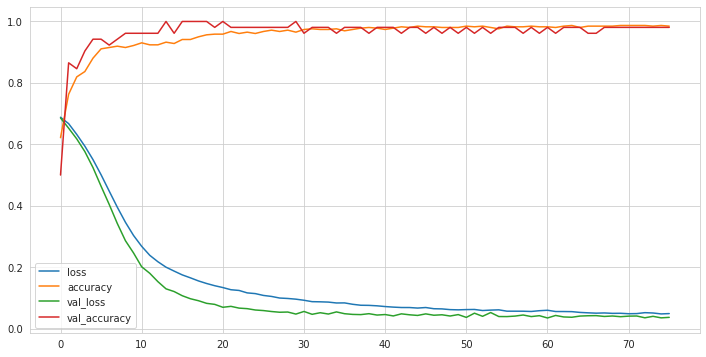

In [166]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# earlystop kullanarak overfittinge girmeden eğitimi durdurmasını sağladık.

In [167]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# modelimin skorunu alırken (validation yaparken) train setindeki ayırdığım %10 ile değil, başta ana datamdan ayırdığım test seti ile yapıyorum.
# model.fit yaparken kullandığımız validation_split ile alınan skorla karıştırmayalım.

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### learning_rate

In [168]:
from tensorflow.keras.optimizers import Adam

In [169]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

#  learning rate ile eğimi çarpıyorduk ve bu bize atacağımız adımın büyüklüğünü veriyordu.
# şimdi adımlarım daha büyüyecek.

In [170]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [171]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.6404 - accuracy: 0.6891 - val_loss: 0.6044 - val_accuracy: 0.6538
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.8543 - val_loss: 0.3880 - val_accuracy: 0.8846
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.9130 - val_loss: 0.3436 - val_accuracy: 0.8269
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9130 - val_loss: 0.1050 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.9348 - val_loss: 0.0917 - val_accuracy: 0.9808
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9435 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9522 - val_loss: 0.0804 - val_accuracy: 0.9615
Epoch

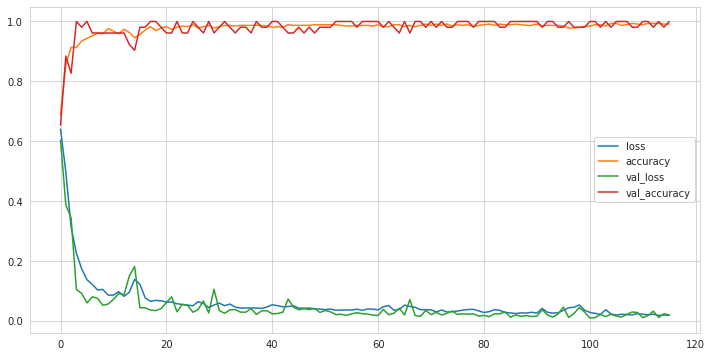

In [172]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# learning rate ile adımlarımı büyüttüğüm için skorda dalgalanma oldu. bu beklenen bir sonuç.

In [173]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [174]:
from tensorflow.keras.layers import Dropout

In [176]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))                   # her seferinde random şekilde nöronların yarısını kapatacak.
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001) # drop out ile overfiti engellemeyi görüyoruz o yüzden earlystop yapmadık
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
  

In [175]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9913 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9913 - val_loss: 0.0353 - val_accuracy: 0.9808
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9870 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9826 - val_loss: 0.0543 - val_accuracy: 0.9615
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9935 - val_loss: 0.0239 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9913 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 

In [177]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


# görüldüğü gibi earlystop kullanmadan sadece Dropout ile overfitting i düşürdük.

AttributeError: ignored

In [178]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 21]
 [ 0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.63      1.00      0.77        36

    accuracy                           0.63        57
   macro avg       0.32      0.50      0.39        57
weighted avg       0.40      0.63      0.49        57



## Saving Final Model and Scaler

In [179]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [180]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [181]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [182]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 22ms/step - loss: 0.7001 - accuracy: 0.5781 - val_loss: 0.6901 - val_accuracy: 0.6316
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6328 - val_loss: 0.6724 - val_accuracy: 0.6316
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6289 - val_loss: 0.6534 - val_accuracy: 0.6491
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6367 - val_loss: 0.6382 - val_accuracy: 0.6667
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6680 - val_loss: 0.6224 - val_accuracy: 0.6667
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7070 - val_loss: 0.6038 - val_accuracy: 0.7193
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.7578 - val_loss: 0.5829 - val_accuracy: 0.7368
Epoch 8/1000
8/8 [=

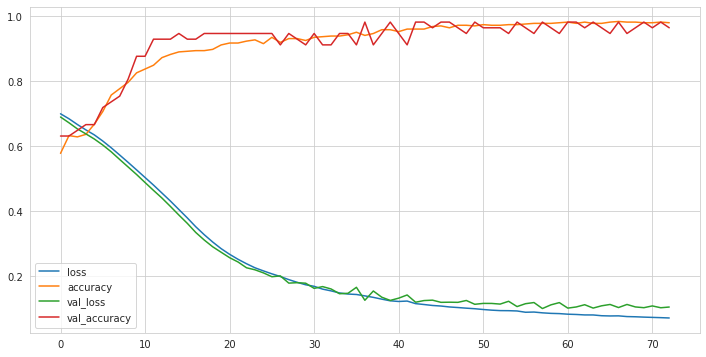

In [183]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [184]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [185]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [186]:
from tensorflow.keras.models import load_model

In [187]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [188]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [189]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[1.799e+01, 1.038e+01, 1.184e-01, 2.776e-01, 3.001e-01, 1.471e-01,
        2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01, 6.399e-03, 4.904e-02,
        5.373e-02, 1.587e-02, 3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [190]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

# değer 0.5 ten büyükse 1 küçükse 0 verecek. (kanser veya değil..)

array([[0]], dtype=int32)

In [191]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# data zaten yeteri kadar küçük oldugu için aslında DL'e ihtiyac yok aslında 

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

